# Feature Transformation

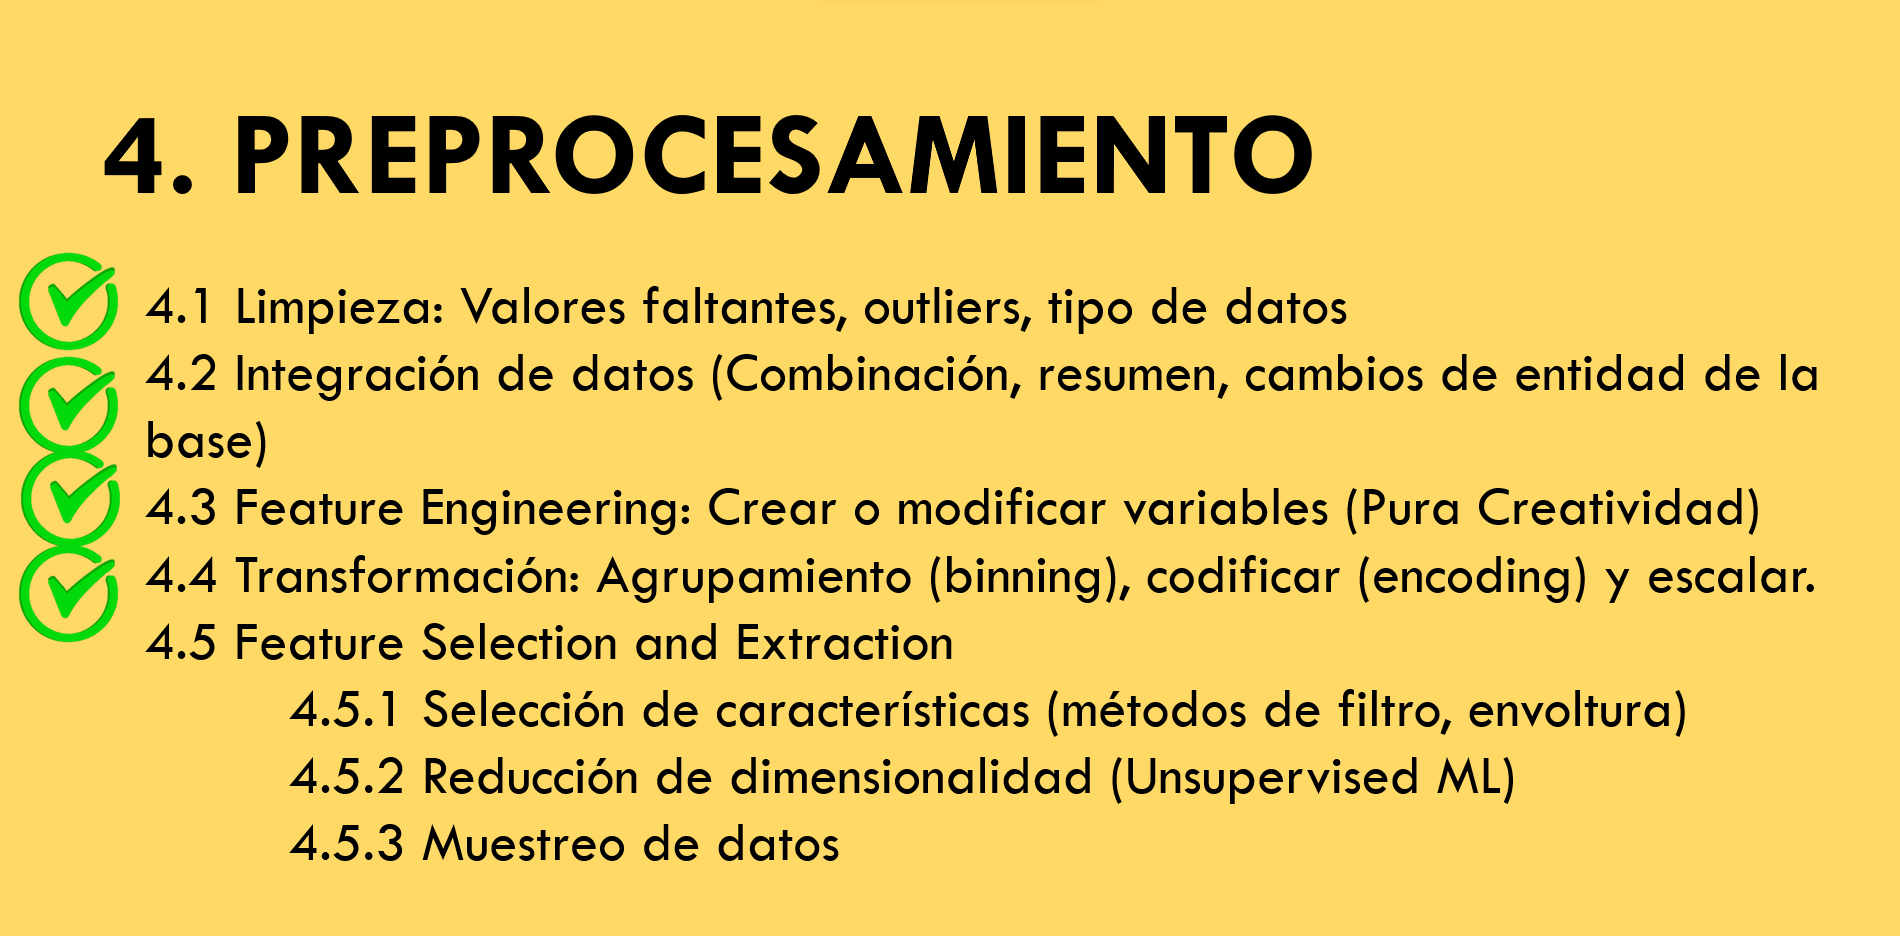

# Antes que nada paréntesis: ¿qué es un transformer object? 
Es un objeto que recibe unos datos de entrada, realiza una transformación determinada, y luego da unos datos de salida. Un buen ejemplo es un traductor, recibe un idioma (datos de entrada), se realizan una transformaciones predeterminadas y luego obtenemos la info en el otro idioma (datos de salida).

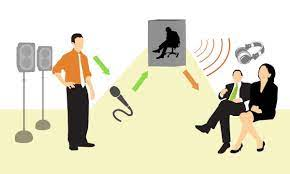

En Python, los transformer objects suelen implementarse como clases que tienen un método `fit` y un método `transform`. 
El método `fit` se utiliza para ajustar la transformación deseada, determinar exactamente cómo se quiere la transformación (para esto normalmente se utiliza un conjunto de datos de entrenamiento) y el método `transform` se utiliza para aplicar la transformación a un conjunto de datos de entrada.

A veces `fit` y `transform` se puede aplicar al mismo tiempo con el método `fit_transform`.

A lo largo de este script veremos muchos ejemplos.

In [1]:
import pandas as pd

# Cargar los datos
df_titanic = pd.read_csv('bases/titanic.csv')

# Mostrar las primeras filas para inspección
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Variables

- **PassengerId:** Identificador único para cada pasajero.
- **Survived:** Si el pasajero sobrevivió (1) o no (0).
- **Pclass:** Clase del pasaje (1, 2, 3).
- **Name:** Nombre del pasajero.
- **Sex:** Sexo del pasajero.
- **Age:** Edad del pasajero.
- **SibSp:** Número de hermanos/cónyuges a bordo.
- **Parch:** Número de padres/hijos a bordo.
- **Ticket:** Número de ticket.
- **Fare:** Tarifa del pasaje.
- **Cabin:** Número de cabina.
- **Embarked:** Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).



In [ ]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Codificación

## One Hot Encoding

In [4]:
# Crear Objeto de la Clase
encoder = OneHotEncoder(sparse=False)

# Aplicar One Hot Encoding a 'Sex' y 'Embarked' (eliminando NaNs para 'Embarked')
df_titanic['Embarked'].fillna('Missing', inplace=True)
encoded_columns = encoder.fit_transform(df_titanic[['Sex', 'Embarked']])

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
encoded_columns

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [5]:
# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

# Unir las nuevas columnas codificadas al DataFrame original (para visualización aquí, omitiremos unirlo)
# df_titanic = df_titanic.join(encoded_df)

# Mostrar las columnas resultantes de la codificación
encoded_df.head()


,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Crear objeto de la clase
label_encoder = LabelEncoder()

# Aplicar Label Encoding a 'Embarked'
embarked_label_encoded = label_encoder.fit_transform(df_titanic['Embarked']) # Esto fue todo

# Crear un DataFrame para visualización
embarked_label_df = pd.DataFrame(embarked_label_encoded, columns=['Embarked_Label'])

# Mostrar las primeras filas del resultado
embarked_label_df.head(10) 


,Embarked_Label
0,3
1,0
2,3
3,3
4,3
5,2
6,3
7,3
8,3
9,0


In [18]:
df_titanic[["PassengerId", "Embarked"]].head(10)

,PassengerId,Embarked
0,1,S
1,2,C
2,3,S
3,4,S
4,5,S
5,6,Q
6,7,S
7,8,S
8,9,S
9,10,C


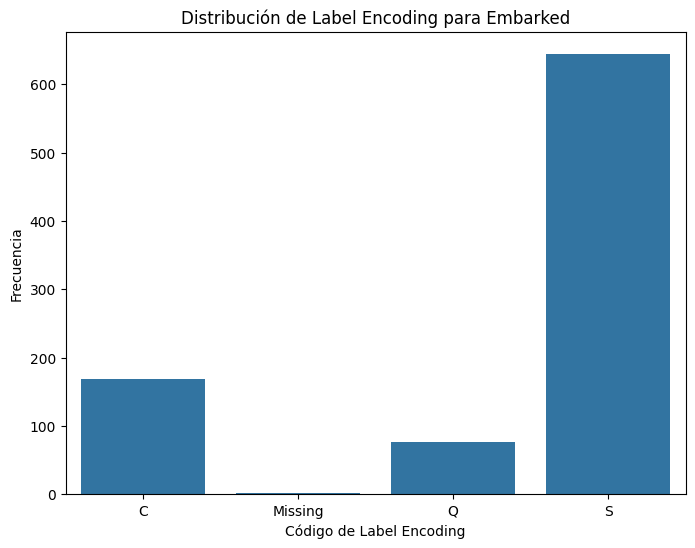

In [20]:
# Gráfico para visualizar Label Encoding de 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(x=embarked_label_encoded)
plt.title('Distribución de Label Encoding para Embarked')
plt.xlabel('Código de Label Encoding')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()

La distribución del Label Encoding para Embarked muestra cómo cada uno de los valores únicos de la columna Embarked ha sido asignado a un entero específico. Los valores están distribuidos entre los códigos generados, representando las diferentes categorías de puertos de embarque, incluyendo la categoría adicional para manejar los valores faltantes que hemos etiquetado como "Missing".

## Binning

Ahora, procederemos a discretizar la columna `Age`. Convertiremos las edades continuas en categorías basadas en rangos de edad para simplificar el análisis. Esto puede ser útil en situaciones donde las relaciones no lineales entre la edad y la variable objetivo (en este caso, Survived) pueden ser mejor capturadas por categorías en lugar de valores continuos.

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
# Preparar y aplicar KBinsDiscretizer para discretizar 'Age'
# Eliminar NaNs de 'Age' para la discretización
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

#Crear el objeto de la clase
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

#Haz la transformación
age_discretized = discretizer.fit_transform(df_titanic[['Age']]) #Aquí fue todo

# Crear un DataFrame para los resultados
age_discretized_df = pd.DataFrame(age_discretized, columns=['Age_Categorized'])

# Unimos para visualización
df_age_discretized = pd.concat([df_titanic['Age'], age_discretized_df], axis=1)

# Mostrar las primeras filas de los resultados
df_age_discretized.head()

,Age,Age_Categorized
0,22.0,1.0
1,38.0,3.0
2,26.0,1.0
3,35.0,3.0
4,35.0,3.0


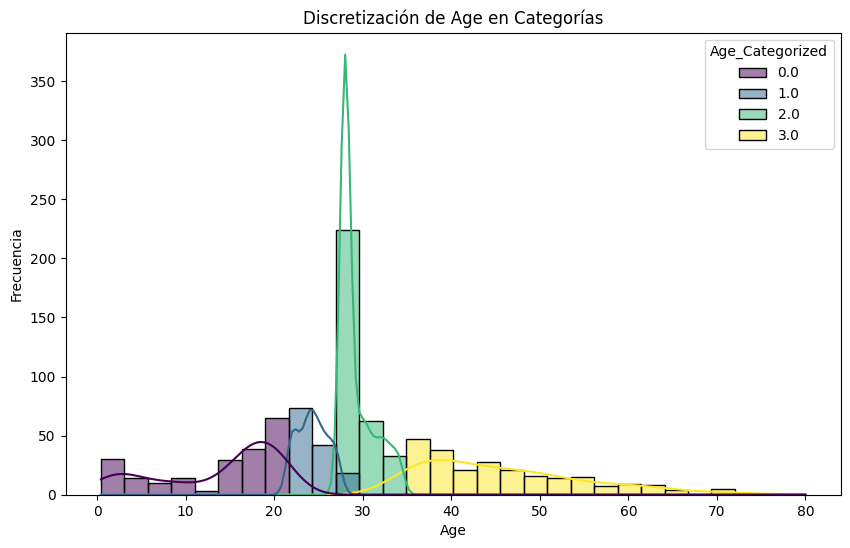

In [23]:
# Gráfico para visualizar la Discretización de 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_age_discretized, x='Age', hue='Age_Categorized', palette='viridis', bins=30, kde=True)
plt.title('Discretización de Age en Categorías')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()


# Scaling

- MinMaxScaler o Normalización

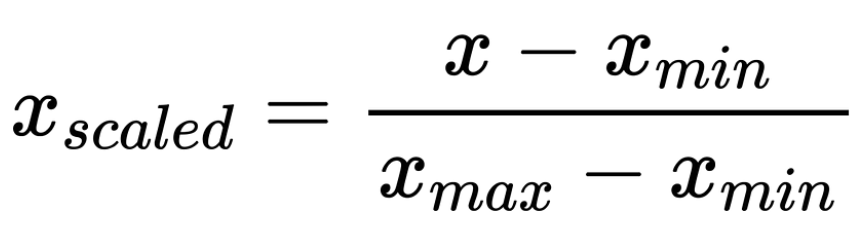

- StandardScaler o Estandarización

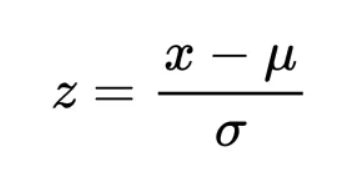

- RobustScaler o Escalador Robusto(?)

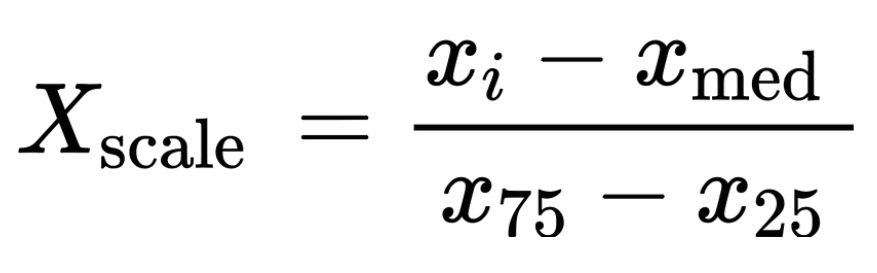

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Preparar los escaladores
min_max_scaler = MinMaxScaler() #Normalización
standard_scaler = StandardScaler() #Estandarización
robust_scaler= RobustScaler()

# Aplicar Normalización a 'Fare'
fare_normalized = min_max_scaler.fit_transform(df_titanic[['Fare']])

# Aplicar Estandarización a 'Fare'
fare_standardized = standard_scaler.fit_transform(df_titanic[['Fare']])

# Aplicar Escalación Robusta a 'Fare'
fare_robustscaled = robust_scaler.fit_transform(df_titanic[['Fare']])

# Convertir los resultados a DataFrame para visualización
fare_normalized_df = pd.DataFrame(fare_normalized, columns=['Fare_Normalized'])
fare_standardized_df = pd.DataFrame(fare_standardized, columns=['Fare_Standardized'])
fare_robust_df = pd.DataFrame(fare_robustscaled, columns=['Fare_Robusted'])

# Unimos para visualización
df_fare_transformed = pd.concat([df_titanic['Fare'], fare_normalized_df, fare_standardized_df,fare_robust_df], axis=1)

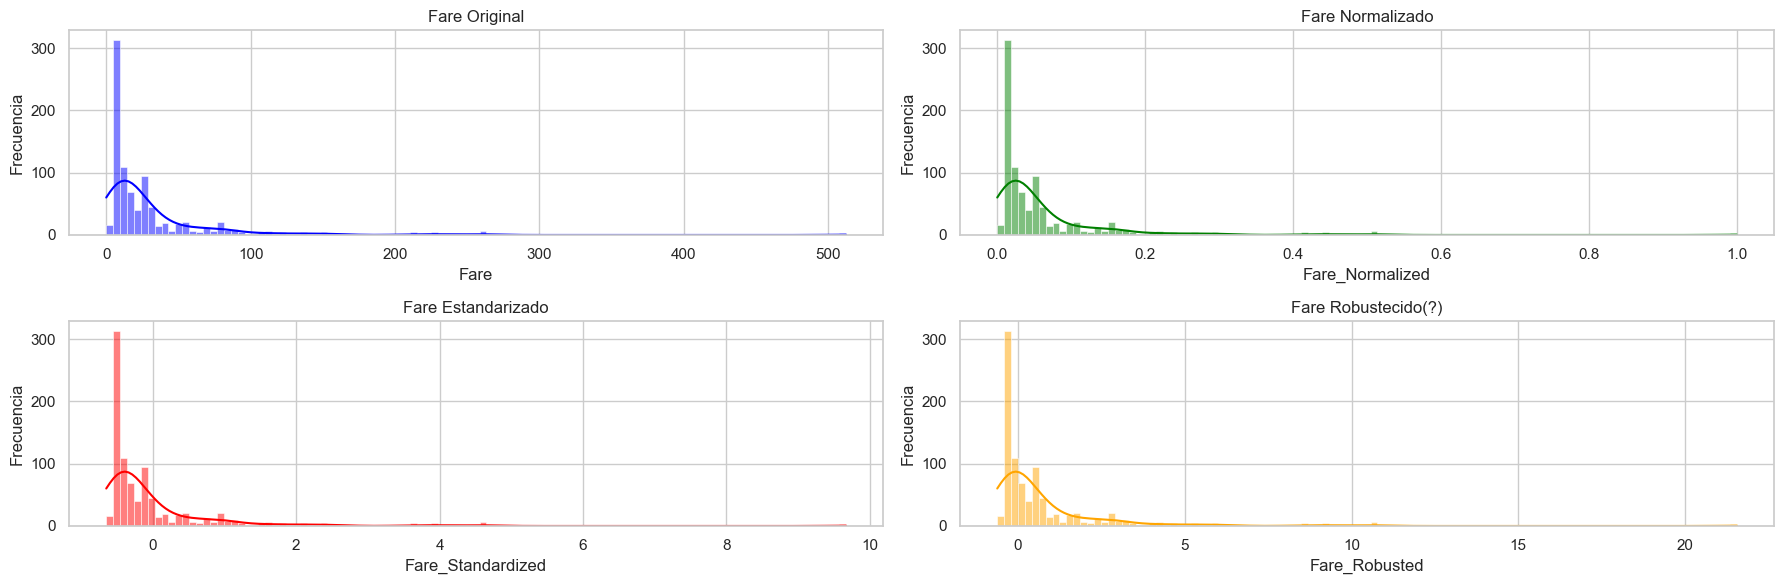

In [36]:
# Visualización de Normalización y Estandarización
fig, ax = plt.subplots(2, 2, figsize=(18, 6))

sns.histplot(df_fare_transformed['Fare'], ax=ax[0,0], kde=True, color="blue")
ax[0,0].set_title('Fare Original')
ax[0,0].set_xlabel('Fare')
ax[0,0].set_ylabel('Frecuencia')

sns.histplot(df_fare_transformed['Fare_Normalized'], ax=ax[0,1], kde=True, color="green")
ax[0,1].set_title('Fare Normalizado')
ax[0,1].set_xlabel('Fare_Normalized')
ax[0,1].set_ylabel('Frecuencia')

sns.histplot(df_fare_transformed['Fare_Standardized'], ax=ax[1,0], kde=True, color="red")
ax[1,0].set_title('Fare Estandarizado')
ax[1,0].set_xlabel('Fare_Standardized')
ax[1,0].set_ylabel('Frecuencia')

sns.histplot(df_fare_transformed['Fare_Robusted'], ax=ax[1,1], kde=True, color="orange")
ax[1,1].set_title('Fare Robustecido(?)')
ax[1,1].set_xlabel('Fare_Robusted')
ax[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Log Transformation (particularmente útil para la variable objetivo)

La normalización escala los datos dentro de un rango específico o estandariza su distribución sin alterar su forma inherente, mientras que la transformación logarítmica puede modificar significativamente la distribución de los datos para hacerlos más manejables o para revelar relaciones lineales ocultas en datos que originalmente presentan una relación exponencial o no lineal. Ambas técnicas son valiosas, pero se aplican en situaciones diferentes y para lograr objetivos distintos en el preprocesamiento de datos para machine learning.

La transformación logarítmica puede mejorar la interpretación y el rendimiento de ciertos modelos alinearitándolos, especialmente en regresiones.

In [46]:
import numpy as np

# Aplicar transformación de Log
fare_log_transformed = np.log1p(df_titanic['Fare'])  # log1p para manejar log(0) aplicando log(1 + x)

# Otro opción: Aplicar transformación de Raíz Cuadrada
fare_sqrt_transformed = np.sqrt(df_titanic['Fare'])

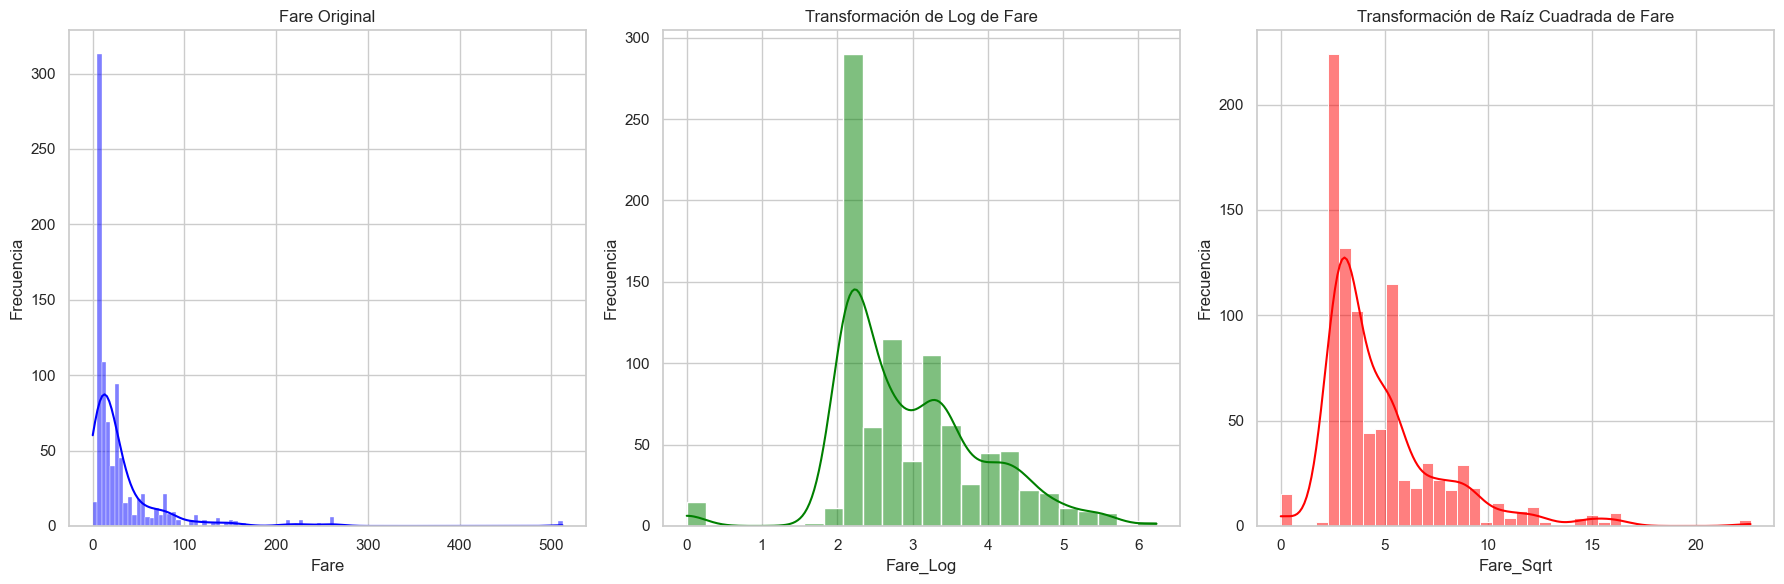

In [45]:
# Visualización de Transformaciones de Log y Raíz Cuadrada
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df_titanic['Fare'], ax=ax[0], kde=True, color="blue")
ax[0].set_title('Fare Original')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Frecuencia')

sns.histplot(fare_log_transformed, ax=ax[1], kde=True, color="green")
ax[1].set_title('Transformación de Log de Fare')
ax[1].set_xlabel('Fare_Log')
ax[1].set_ylabel('Frecuencia')

sns.histplot(fare_sqrt_transformed, ax=ax[2], kde=True, color="red")
ax[2].set_title('Transformación de Raíz Cuadrada de Fare')
ax[2].set_xlabel('Fare_Sqrt')
ax[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Crear Variables de grado superior

In [48]:
from sklearn.preprocessing import PolynomialFeatures

# Crear objeto de la clase
poly = PolynomialFeatures(degree=2, include_bias=False)

# Seleccionar las columnas 'Age' y 'Fare' para la transformación
age_fare = df_titanic[['Age', 'Fare']]

# Aplicar transformación polinomial
age_fare_poly = poly.fit_transform(age_fare)

# Crear un DataFrame para los resultados
age_fare_poly_df = pd.DataFrame(age_fare_poly, columns=poly.get_feature_names_out(['Age', 'Fare']))

# Mostrar las primeras filas de los resultados
age_fare_poly_df.head()

# No hay una visualización directa para la generación de características polinomiales que sea informativa sin contexto específico de modelado,
# así que procederemos a discutir la interpretación de estas características.


,Age,Fare,Age^2,Age Fare,Fare^2
0,22.0,7.2500,484.0,159.5000,52.562500
1,38.0,71.2833,1444.0,2708.7654,5081.308859
2,26.0,7.9250,676.0,206.0500,62.805625
3,35.0,53.1000,1225.0,1858.5000,2819.610000
4,35.0,8.0500,1225.0,281.7500,64.802500
